In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 动态版

动态版每当bar到达，都会按需求计算所有缠论元素。

## 准备

### 引用模块

In [2]:
from typing import List

import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    get_saved_filename,
    save_dataframe_to_csv
)
from InvestmentWorkshop.indicator.chan.dynamic import ChanTheory

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'
dt_start: str = '2021-10-15 13:30:00'
dt_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc[dt_start:dt_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


## 计算

In [7]:
count: int = 400
chan_dynamic: ChanTheory = ChanTheory(strict=True, log=True, verbose=True)
chan_dynamic.run_with_dataframe(df_ohlc, count=count)


【第    0 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 1 根合并K线，起始id（普通K线）= 0，周期 = 1，high = 23900.0，low = 23840.0。

  ○ 尝试生成笔：目前仅有 1 根合并K线，最少需要 5 根。

  ■ 处理完毕。

    合并K线数量： 1。
      向向左第1根合并K线：自 0 至 0，周期 = 1；
      向向左第2根合并K线：不存在；
      向向左第3根合并K线：不存在；

    分型数量： 0。
      向向左第1个分型：不存在。
      向向左第2个分型：不存在。

    笔数量： 0。
      向前左第1个笔：不存在。
      向前左第2个笔：不存在。
      向前左第3个笔：不存在。

    线段数量： 0。
      向向左第1个线段：不存在。
      向向左第2个线段：不存在。
      向向左第3个线段：不存在。

    笔中枢数量： 0。
      向向左第1个笔中枢：不存在。
      向向左第2个笔中枢：不存在。

    段中枢数量： 0。
      向向左第1个段中枢：不存在。
      向向左第2个段中枢：不存在。

【第    1 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 1 根合并K线，起始id（普通K线）= 1，周期 = 2，high = 23900.0，low = 23840.0。

  ■ 处理完毕。

    合并K线数量： 1。
      向向左第1根合并K线：自 0 至 1，周期 = 2；
      向向左第2根合并K线：不存在；
      向向左第3根合并K线：不存在；

    分型数量： 0。
      向向左第1个分型：不存在。
      向向左第2个分型：不存在。

    笔数量： 0。
      向前左第1个笔：不存在。
      向前左第2个笔：不存在。
      向前左第3个笔：不存在。

    线段数量： 0。
      向向左第1个线段：不存在。
      向向左第2个线段：不存在。
      向向左第3个线段：不存在。

    笔中枢数量： 0。
      向向左第1个笔中枢：不存在。
    

## 结果

### 合并K线

In [8]:
length: int = len(chan_dynamic.merged_candles)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_dynamic.merged_candles[i]}')

   0, MergedCandle (id = 0, period = 4, left ordinary id = 0, right ordinary id = 3, high = 23900.0, low = 23840.0)
   1, MergedCandle (id = 1, period = 2, left ordinary id = 4, right ordinary id = 5, high = 23855.0, low = 23830.0)
   2, MergedCandle (id = 2, period = 1, left ordinary id = 6, right ordinary id = 6, high = 23900.0, low = 23875.0)
   3, MergedCandle (id = 3, period = 1, left ordinary id = 7, right ordinary id = 7, high = 23915.0, low = 23880.0)
   4, MergedCandle (id = 4, period = 2, left ordinary id = 8, right ordinary id = 9, high = 23885.0, low = 23845.0)
   5, MergedCandle (id = 5, period = 1, left ordinary id = 10, right ordinary id = 10, high = 23920.0, low = 23865.0)
   6, MergedCandle (id = 6, period = 1, left ordinary id = 11, right ordinary id = 11, high = 23955.0, low = 23910.0)
   7, MergedCandle (id = 7, period = 1, left ordinary id = 12, right ordinary id = 12, high = 23985.0, low = 23945.0)
   8, MergedCandle (id = 8, period = 2, left ordinary id = 13, rig

### 分型

In [9]:
length: int = len(chan_dynamic.fractals)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_dynamic.fractals[i]}')

### 笔

In [10]:
length: int = len(chan_dynamic.strokes)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_dynamic.strokes[i]}')

  0, Stroke (id=0, trend=上升, period=6, left merged id=1, right merged id=7, left ordinary id=5, right ordinary id=12, left price=23830.0, right price=23985.0)
  1, Stroke (id=1, trend=下降, period=8, left merged id=7, right merged id=15, left ordinary id=12, right ordinary id=25, left price=23985.0, right price=23870.0)
  2, Stroke (id=2, trend=上升, period=10, left merged id=15, right merged id=25, left ordinary id=25, right ordinary id=37, left price=23870.0, right price=24015.0)
  3, Stroke (id=3, trend=下降, period=11, left merged id=25, right merged id=36, left ordinary id=37, right ordinary id=54, left price=24015.0, right price=23880.0)
  4, Stroke (id=4, trend=上升, period=34, left merged id=36, right merged id=70, left ordinary id=54, right ordinary id=105, left price=23880.0, right price=24760.0)
  5, Stroke (id=5, trend=下降, period=8, left merged id=70, right merged id=78, left ordinary id=105, right ordinary id=118, left price=24760.0, right price=24435.0)
  6, Stroke (id=6, trend=上

### 线段

In [11]:
length: int = len(chan_dynamic.segments)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_dynamic.segments[i]}')

 0, Segment (id=0, trend=上升, left ordinary id = 5, right ordinary id = 105, count of strokes = 5, strokes = [0, 1, 2, 3, 4])
 1, Segment (id=1, trend=下降, left ordinary id = 105, right ordinary id = 171, count of strokes = 3, strokes = [5, 6, 7])
 2, Segment (id=2, trend=上升, left ordinary id = 171, right ordinary id = 258, count of strokes = 3, strokes = [8, 9, 10])
 3, Segment (id=3, trend=下降, left ordinary id = 248, right ordinary id = 380, count of strokes = 7, strokes = [11, 12, 13, 14, 15, 16, 17])


### 笔中枢

In [12]:
length: int = len(chan_dynamic.stroke_pivots)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_dynamic.stroke_pivots[i]}')

## 绘图

volume_width :  0.825
volume_linewidth :  0.65
ohlc_ticksize :  0.35
ohlc_linewidth :  0.525
candle_width :  0.415
candle_linewidth :  0.435
line_width :  0.791
Plot done.


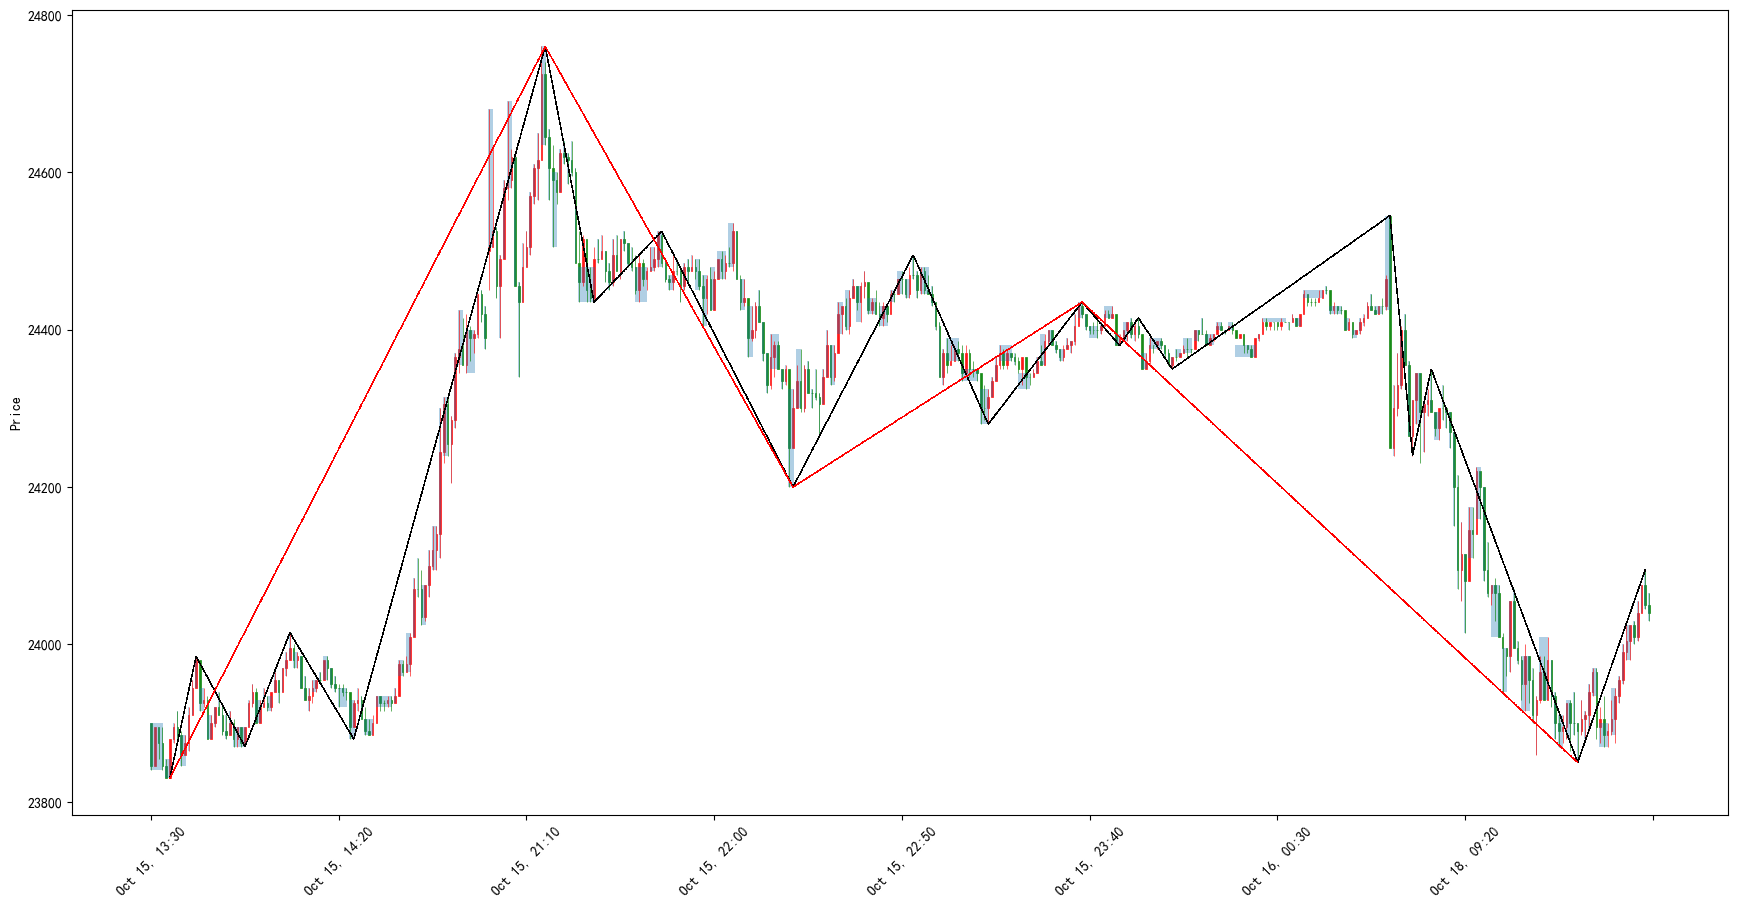

In [13]:
chan_dynamic.plot(
    df_ohlc,
    count,
    show_ordinary_id=False,
    show_merged_id=False,
    show_all_merged=True,
    hatch_merged=False,
    fractal_marker_size=50,
    fractal_marker_offset=30
)